In [1]:
import pandas as pd
import numpy

In [2]:
training_metrics = {
    "Epoch": [1, 2, 3],
    "Training Loss": [0.1256, 0.1022, 0.0678],
    "Validation Loss": [0.135535, 0.118114, 0.108424],
    "Accuracy": [0.963238, 0.971784, 0.974683]
}

metrics_df = pd.DataFrame(training_metrics)
metrics_df

,Epoch,Training Loss,Validation Loss,Accuracy
0,1,0.1256,0.135535,0.963238
1,2,0.1022,0.118114,0.971784
2,3,0.0678,0.108424,0.974683


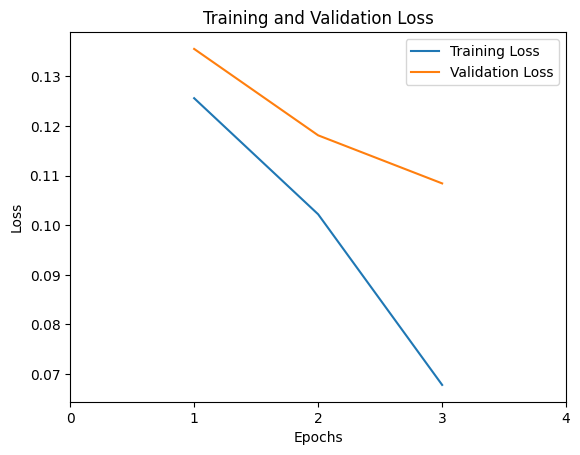

In [7]:
from pickle import load
from matplotlib.pylab import plt
from numpy import arange

# Retrieve each dictionary's values
train_values = metrics_df['Training Loss'].values
val_values = metrics_df['Validation Loss'].values
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 4)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 5, 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [77]:
train_file = "../data/final_training_set.csv"
train_df = pd.read_csv(train_file)

train_df = train_df.query('label == 1').copy()

A_alleles = train_df.loc[train_df.Allele.apply(lambda x: x.startswith('A'))].copy()
B_alleles = train_df.loc[train_df.Allele.apply(lambda x: x.startswith('B'))].copy()
C_alleles = train_df.loc[train_df.Allele.apply(lambda x: x.startswith('C'))].copy()

A_randoms = A_alleles.loc[A_alleles.Length == 9].sample(10000).copy()
B_randoms = B_alleles.loc[B_alleles.Length == 9].sample(10000).copy()
C_randoms = C_alleles.loc[C_alleles.Length == 9].sample(10000).copy()

A_randoms['new_pep'] = C_randoms['Peptide'].tolist()
B_randoms['new_pep'] = A_randoms['Peptide'].tolist()
C_randoms['new_pep'] = B_randoms['Peptide'].tolist()

A_randoms['predict_on'] = A_randoms['allele_sequence'] + A_randoms['new_pep']
B_randoms['predict_on'] = B_randoms['allele_sequence'] + B_randoms['new_pep']
C_randoms['predict_on'] = C_randoms['allele_sequence'] + C_randoms['new_pep']

randomized_peptides = pd.concat([A_randoms, B_randoms, C_randoms]).copy()
randomized_peptides.reset_index(drop=True, inplace=True)
randomized_peptides

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,new_pep
0,A3401,9,QVAPPVLKR,1,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.197098,2.422075,0.920095,FAYPAIRYL
1,A0202,9,LLCDLINKL,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,-3.076999,3.334703,0.995639,NTIDPSHPM
2,A3401,9,EPFKGEMNR,1,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.316211,2.551727,0.943310,IAAVTDIPL
3,A3401,9,ELLTSSKDR,1,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAIMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,1.184612,-1.442003,0.424984,SGHTVVLTM
4,A0211,9,YMHFLENQV,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,-1.978589,2.205134,0.886573,RSTLVLHDL
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C0303,9,LANPHELSL,1,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,375,1,-2.999901,3.253957,0.992217,AQHLFLQAF
29996,C1403,9,FYPDKIDYA,1,MRVMAPRTLILLLSGALALTETWACSHSMRYFSTSVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFSTSVSRPGRGEPHF...,375,1,-2.691772,2.934948,0.980572,ISNPKTAEF
29997,C0304,9,LVFPGFFEL,1,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,375,1,-2.836446,3.086812,0.986788,DPPSNPVAA
29998,C0401,9,SFDNIKNWI,1,MRVMAPRTLILLLSGALALTETWAGSHSMRYFSTSVSWPGRGEPRF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFSTSVSWPGRGEPRF...,375,1,-2.588985,2.828303,0.970791,LKALLLSSY


In [79]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer

model_checkpoint = "esm2_t12_35M_UR50D_MHCI_classification/checkpoint-310935/"

#Generate data
random_sequences = randomized_peptides['predict_on'].tolist()
random_labels = randomized_peptides['label'].tolist()

#Tokenize data
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

print("Tokenizing random data...")
test_tokenized = tokenizer(random_sequences)


Tokenizing random data...


In [80]:
from tqdm import tqdm
import tensorflow as tf
import torch
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import pickle
from datasets import Dataset
import pandas as pd
import numpy as np
import pickle
import transformers
from tqdm import tqdm
import torch
from evaluate import load

val_dset = Dataset.from_dict(test_tokenized)
val_dset = val_dset.add_column("labels", random_labels)


model_checkpoint = "esm2_t12_35M_UR50D_MHCI_classification/checkpoint-310935/"
device = torch.device('cuda')
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2).to(device)

#model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#epoch = checkpoint['epoch']
#loss = checkpoint['loss']



model.eval(); #enable for prediction
final_predictions = []
final_logits = []

with torch.no_grad():
    iterator = 64 #Number of predictions to get with each loop
    for i, n in enumerate(tqdm(range(0, val_dset.num_rows, iterator))):
        try:
            # Retrieve item
            item = val_dset[n:n+iterator]
            sequence = item['input_ids']
            label = item['labels']
            attention_mask = item['attention_mask']
    
            # Generate prediction
            predictions = model(torch.IntTensor(sequence).to(device), torch.IntTensor(attention_mask).to(device))
            final_logits = final_logits + [x for x in predictions['logits'].cpu()]
            ret = [x[1].numpy() for x in tf.nn.sigmoid(predictions['logits'].cpu())]
            final_predictions = final_predictions + ret
        except: #Different lengths occurred... Drat
            for index in range(n, n+iterator):
                item = val_dset[index]
                sequence = [item['input_ids']]
                label = [item['labels']]
                attention_mask = [item['attention_mask']]

                # Generate prediction
                predictions = model(torch.IntTensor(sequence).to(device), torch.IntTensor(attention_mask).to(device))
                final_logits = final_logits + [x for x in predictions['logits'].cpu()]
                ret = [x[1].numpy() for x in tf.nn.sigmoid(predictions['logits'].cpu())]
                final_predictions = final_predictions + ret 

100%|█████████████████████████████████████████████████████████████████████████████████| 469/469 [03:51<00:00,  2.03it/s]


In [81]:
predicted_class =[ int(np.argmax(prediction).numpy()) for prediction in final_logits]
len([x for x in predicted_class if x == 1])

2978

In [82]:
len([x for x in predicted_class[:10000] if x == 1])

1359

In [83]:
len([x for x in predicted_class[10000:20000] if x == 1])

586

In [84]:
len([x for x in predicted_class[20000:30000] if x == 1])

1033

In [64]:
1701/10000

0.1701

In [38]:
5074/30000

0.16913333333333333

In [39]:
24926/30000

0.8308666666666666

In [44]:
train_df.iloc[A_randoms.index]['Peptide']

187907    GTADITLRF
125396    CNRVSMLAV
192306    GAVRTPLSQ
100277    RLVEIQYEL
156717    MLEQKAPVF
            ...    
278411    LTSEVHSVR
63646     ALQKLEHLS
33511     GEPPLSPLP
271457    YYQQIHHGE
72793     PVTAVALAT
Name: Peptide, Length: 10000, dtype: object

In [85]:
final_predictions_random = final_predictions.copy()
final_logits_random = final_logits.copy()

try:
    del final_logits
    del final_predictions
except:
    pass

#train_file = "../data/final_training_set.csv"
train_df = pd.read_csv(train_file)

#Undo damage, check unshuffled 
A_randoms['Peptide'] = train_df.iloc[A_randoms.index]['Peptide'].tolist()
B_randoms['Peptide'] = train_df.iloc[B_randoms.index]['Peptide'].tolist()
C_randoms['Peptide'] = train_df.iloc[C_randoms.index]['Peptide'].tolist()

A_randoms['predict_on'] = A_randoms['allele_sequence'] + A_randoms['Peptide']
B_randoms['predict_on'] = B_randoms['allele_sequence'] + B_randoms['Peptide']
C_randoms['predict_on'] = C_randoms['allele_sequence'] + C_randoms['Peptide']

randomized_peptides = pd.concat([A_randoms, B_randoms, C_randoms]).copy()
randomized_peptides.reset_index(drop=True, inplace=True)
randomized_peptides


from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer

model_checkpoint = "esm2_t12_35M_UR50D_MHCI_classification/checkpoint-310935/"

#Generate data
random_sequences = randomized_peptides['predict_on'].tolist()
random_labels = randomized_peptides['label'].tolist()

#Tokenize data
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

print("Tokenizing random data...")
test_tokenized = tokenizer(random_sequences)


from tqdm import tqdm
import tensorflow as tf
import torch
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import pickle
from datasets import Dataset
import pandas as pd
import numpy as np
import pickle
import transformers
from tqdm import tqdm
import torch
from evaluate import load

val_dset = Dataset.from_dict(test_tokenized)
val_dset = val_dset.add_column("labels", random_labels)


model_checkpoint = "esm2_t12_35M_UR50D_MHCI_classification/checkpoint-310935/"
device = torch.device('cuda')
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2).to(device)

#model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#epoch = checkpoint['epoch']
#loss = checkpoint['loss']



model.eval(); #enable for prediction
final_predictions = []
final_logits = []

with torch.no_grad():
    iterator = 64 #Number of predictions to get with each loop
    for i, n in enumerate(tqdm(range(0, val_dset.num_rows, iterator))):
        try:
            # Retrieve item
            item = val_dset[n:n+iterator]
            sequence = item['input_ids']
            label = item['labels']
            attention_mask = item['attention_mask']
    
            # Generate prediction
            predictions = model(torch.IntTensor(sequence).to(device), torch.IntTensor(attention_mask).to(device))
            final_logits = final_logits + [x for x in predictions['logits'].cpu()]
            ret = [x[1].numpy() for x in tf.nn.sigmoid(predictions['logits'].cpu())]
            final_predictions = final_predictions + ret
        except: #Different lengths occurred... Drat
            for index in range(n, n+iterator):
                item = val_dset[index]
                sequence = [item['input_ids']]
                label = [item['labels']]
                attention_mask = [item['attention_mask']]

                # Generate prediction
                predictions = model(torch.IntTensor(sequence).to(device), torch.IntTensor(attention_mask).to(device))
                final_logits = final_logits + [x for x in predictions['logits'].cpu()]
                ret = [x[1].numpy() for x in tf.nn.sigmoid(predictions['logits'].cpu())]
                final_predictions = final_predictions + ret 

Tokenizing random data...


100%|█████████████████████████████████████████████████████████████████████████████████| 469/469 [03:48<00:00,  2.05it/s]


In [87]:
predicted_class =[ int(np.argmax(prediction).numpy()) for prediction in final_logits]
len([x for x in predicted_class if x == 1])

28584

In [88]:
len([x for x in predicted_class[:10000] if x == 1])

9551

In [89]:
len([x for x in predicted_class[10000:20000] if x == 1])

9552

In [90]:
len([x for x in predicted_class[20000:30000] if x == 1])

9481

In [55]:
final_logits_random

[tensor([-2.4506,  2.7099]),
 tensor([ 4.4017, -4.6589]),
 tensor([ 3.2566, -3.5858]),
 tensor([-2.8449,  3.1022]),
 tensor([ 2.3301, -2.6401]),
 tensor([ 4.3369, -4.6087]),
 tensor([ 4.1159, -4.4122]),
 tensor([ 4.3863, -4.6303]),
 tensor([-2.8727,  3.1581]),
 tensor([-2.6408,  2.8916]),
 tensor([-3.0459,  3.3083]),
 tensor([-3.2101,  3.4731]),
 tensor([-2.9975,  3.2685]),
 tensor([-2.8028,  3.0484]),
 tensor([ 4.3680, -4.6108]),
 tensor([ 3.7819, -4.0846]),
 tensor([ 3.9506, -4.2462]),
 tensor([-3.0040,  3.2585]),
 tensor([ 1.9671, -2.2637]),
 tensor([ 2.9588, -3.2806]),
 tensor([ 2.3741, -2.6773]),
 tensor([ 2.8014, -3.1355]),
 tensor([ 4.3897, -4.6260]),
 tensor([-2.5700,  2.8147]),
 tensor([-2.5762,  2.8205]),
 tensor([ 4.4082, -4.6488]),
 tensor([-2.6646,  2.9043]),
 tensor([ 3.4951, -3.7987]),
 tensor([ 4.3719, -4.5860]),
 tensor([ 4.1125, -4.4116]),
 tensor([ 4.2803, -4.5521]),
 tensor([-3.2960,  3.5665]),
 tensor([ 4.1580, -4.4425]),
 tensor([ 4.3926, -4.6257]),
 tensor([ 3.97

NameError: name 'train_df' is not defined